PREDICTION USING DECISION TREE ALGORITHM

Creating a decision tree classifier and visualizing it graphically

In [ ]:
# Importing libraries in Python
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report


url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
iris_data = pd.read_csv(path)



In [ ]:
iris_data.shape

(150, 6)

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Correlation
corr_df = iris_data.corr()
corr_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Figure size 720x576 with 0 Axes>

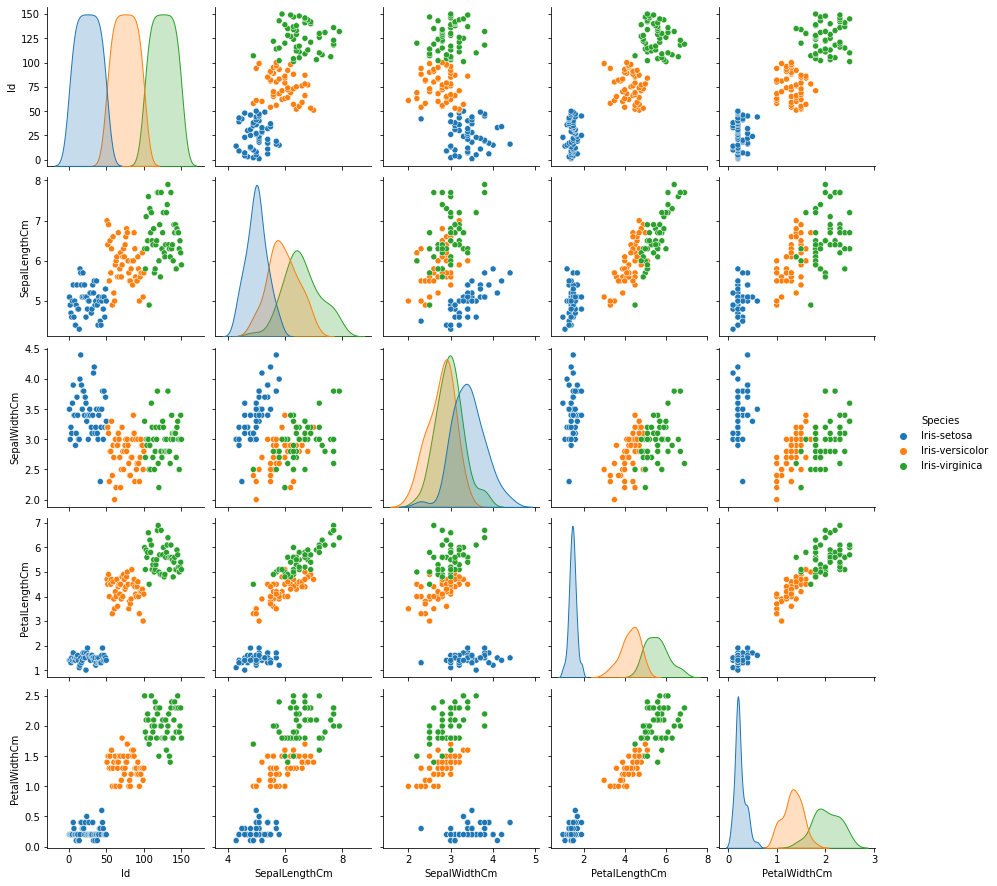

In [ ]:
#Ploting datset
plt.figure(figsize=(10,8))
sns.pairplot(iris_data.dropna(),hue="Species")


In [ ]:
X = iris_data.iloc[:, 1:5]
Y = iris_data.iloc[:, 5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TreeModel = DecisionTreeClassifier(random_state=0)
TreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
Y_pred = TreeModel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy of this model is {}%'.format(round(accuracy*100),2))

Accuracy of this model is 98.0%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [ ]:
print(classification_report(Y_test, Y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Visualizing the decision tree

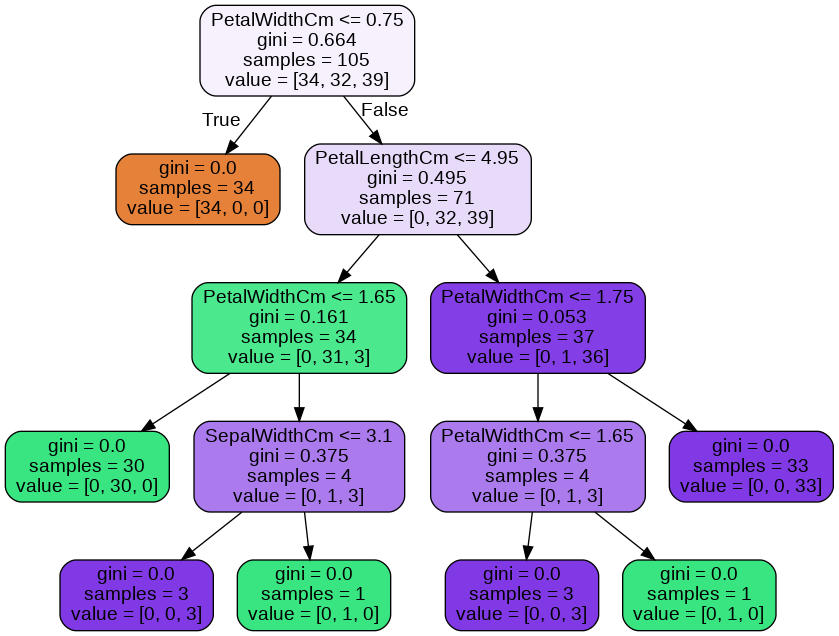

In [ ]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = export_graphviz(TreeModel, out_file=None,feature_names=X_train.columns, filled = True, rounded=True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

Controlling tree growth

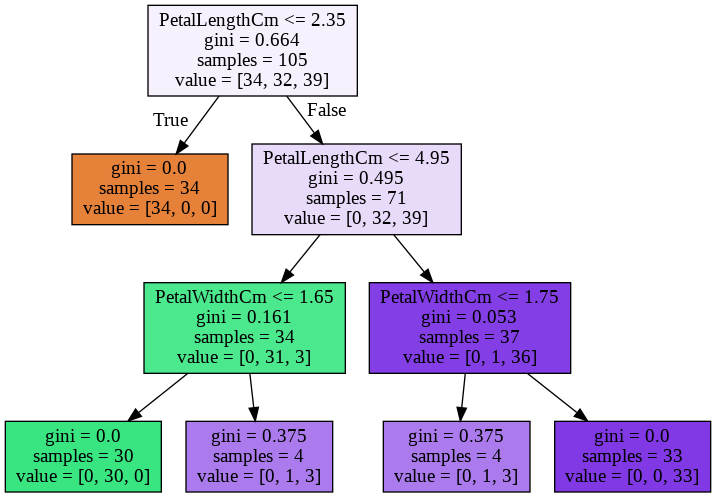

In [ ]:
tree2 = DecisionTreeClassifier(min_samples_split = 10)
tree2.fit(X_train, Y_train)
dot_data = export_graphviz(tree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())


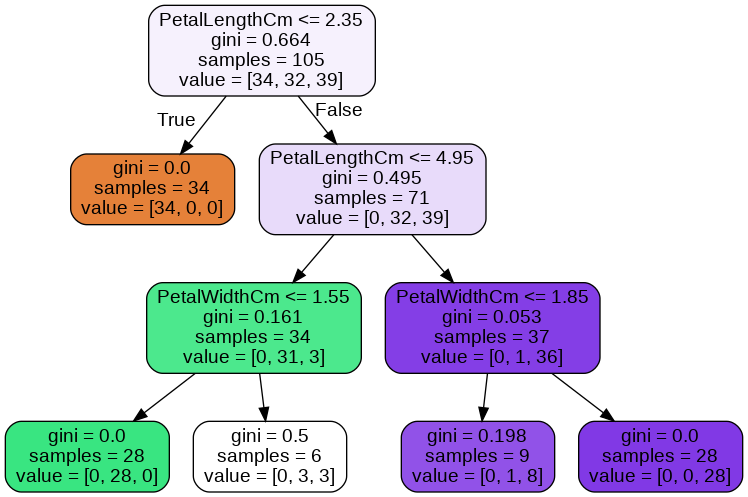

In [ ]:
tree3 = DecisionTreeClassifier(min_samples_leaf =5, max_depth=4)
tree3.fit(X_train, Y_train)
dot_data = export_graphviz(tree3, out_file=None,feature_names=X_train.columns, filled = True, rounded=True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())


Predict for new set of values

In [ ]:
import pickle
pickle.dump(TreeModel, open('DecisionTree.pkl','wb'))
tree= pickle.load(open('DecisionTree.pkl','rb'))
print(tree.predict([[5.6,2.43,4.123,1.23]]))


['Iris-versicolor']
